# Serenitas : Aplikasi Konsultasi dan Terapi Psikologi

**Kelompok 6** :    

- Muhammad Alif
- Muhammad Khairrudin
- Kevin Rafif

---

# Langkah Awal Data Import

In [ ]:

import numpy as np  # Import library numpy untuk operasi numerik
import pandas as pd  # Import library pandas untuk manipulasi data

# **Data Collecting: Jumlah, Bentuk, dan Kualitas Data**
**Penjelasan**:
- **Jumlah Data**: Data yang digunakan berupa file JSON (`serenitas.json`) yang berisi intents (tag, patterns, dan responses).
- **Bentuk Data**:
  - `patterns`: Berisi pola pertanyaan atau kalimat yang bisa dimasukkan oleh pengguna.
  - `responses`: Berisi jawaban atau respons yang akan diberikan oleh bot.
  - `tag`: Kategori atau label untuk masing-masing pola.




In [ ]:
import json

with open('serenitas.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,salam,"[Hai, Hai, Apakah ada orang di sana?, Hai, yan...","[Halo. , Hai, yang di sana. , Hai, yang di san..."
1,Pagi,[Selamat pagi],[Selamat pagi. ]
2,sore,[Selamat siang],[Selamat siang. ]
3,malam,[Selamat malam],[Selamat malam. ]
4,malam,[Selamat malam],"[Selamat malam. , Selamat malam. ]"
...,...,...,...
75,fakta-28,[Apa yang harus saya lakukan jika saya khawati...,[Yang paling penting adalah berbicara dengan s...
76,fakta-29,[Bagaimana saya tahu kalau saya tidak sehat?],"[Jika keyakinan, pemikiran, perasaan, atau per..."
77,fakta-30,[Bagaimana saya bisa menjaga hubungan sosial? ],"[Banyak orang yang sendirian saat ini, tapi ki..."
78,fakta-31,[Apa perbedaan antara kecemasan dan stres?],[Stres dan kecemasan sering digunakan secara b...


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}  # Membuat dictionary kosong untuk menyimpan data yang akan diubah ke DataFrame
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]  # Mengambil pola (patterns) dari DataFrame
    rspns = df[df.index == i]['responses'].values[0]  # Mengambil respons dari DataFrame
    tag = df[df.index == i]['tag'].values[0]  # Mengambil tag dari DataFrame
    for j in range(len(ptrns)):
        dic['tag'].append(tag)  # Menambahkan tag ke dalam dictionary
        dic['patterns'].append(ptrns[j])  # Menambahkan pola ke dalam dictionary
        dic['responses'].append(rspns)  # Menambahkan respons ke dalam dictionary

df = pd.DataFrame.from_dict(dic)  # Membuat DataFrame baru dari dictionary
pd.set_option("display.max_rows", None)  # Menampilkan semua baris DataFrame ketika ditampilkan

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()


{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hai": 4, "apakah": 10, "ada": 8, "orang": 1, "di": 9, "sana": 2, "yang": 25, "halo": 3, "selamat": 9, "datang": 2, "konnichiwa": 1, "tag": 1, "guten": 1, "ola": 1, "pagi": 1, "siang": 1, "malam": 2, "tinggal": 3, "sampai": 3, "jumpa": 3, "lagi": 6, "kembali": 1, "sayonara": 1, "oke": 4, "jalan": 1, "terima": 5, "kasih": 5, "itu": 13, "berguna": 5, "atas": 1, "bantuannya": 1, "banyak": 5, "tidak": 36, "siapa": 8, "kamu": 22, "apa": 31, "ceritakan": 6, "lebih": 6, "tentang": 10, "diri": 7, "anda": 11, "namamu": 2, "aku": 14, "harus": 4, "memanggilmu": 1, "dirimu": 1, "bisa": 14, "lakukan": 4, "menciptakanmu": 1, "bagaimana": 7, "dibuat": 1, "diciptakan": 1, "nama": 2, "saya": 100, "adalah": 2, "lewat": 1, "bisakah": 4, "membantu": 3, "tolong": 2, "bantu": 1, "untukku": 1, "butuh": 4, "dukungan": 1, "ban

In [ ]:
df

,tag,patterns,responses
0,salam,Hai,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
1,salam,Hai,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
2,salam,Apakah ada orang di sana?,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
3,salam,"Hai, yang di sana","[Halo. , Hai, yang di sana. , Hai, yang di san..."
4,salam,Halo,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
5,salam,Hai,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
6,salam,Halo,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
7,salam,Halo,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
8,salam,Selamat datang,"[Halo. , Hai, yang di sana. , Hai, yang di san..."
9,salam,Konnichiwa,"[Halo. , Hai, yang di sana. , Hai, yang di san..."


### **Data Analisis & Visualisasi: Metadata yang Mendalam serta Visualisasi Dataset**
**Penjelasan**:
1. **Eksplorasi Data**: Menampilkan informasi tentang tag yang unik dalam dataset menggunakan `df['tag'].unique()`.
2. **Analisis Dataset**: Data `patterns` diubah menjadi urutan angka menggunakan `Tokenizer`, sedangkan label (tag) diubah menjadi angka menggunakan `LabelEncoder`.
3. **Visualisasi**:
   - Menampilkan visualisasi akurasi dan loss selama pelatihan menggunakan `matplotlib`.
   - Plot perbandingan antara akurasi training dan validation.

In [ ]:
df['tag'].unique()

array(['salam', 'Pagi', 'sore', 'malam', 'selamat tinggal',
       'terima kasih', 'tidak ada respons', 'respons netral', 'tentang',
       'keahlian', 'penciptaan', 'nama', 'membantu', 'sedih', 'stres',
       'tidak berguna', 'tertekan', 'senang', 'kasual', 'cemas',
       'tidak berbicara', 'tidur', 'takut', 'kematian', 'memahami',
       'Selesai', 'bunuh diri', 'benci kamu', 'benci aku', 'bawaan',
       'candaan', 'mengulang', 'salah', 'bodoh', 'lokasi',
       'sesuatu yang lain', 'teman-teman', 'bertanya', 'masalah',
       'tidak ada pendekatan', 'pelajari lebih lanjut', 'setuju pengguna',
       'meditasi', 'meditasi pengguna', 'pandora-berguna',
       'saran pengguna', 'belajar-kesehatan mental',
       'fakta kesehatan mental', 'fakta-1', 'fakta-2', 'fakta-3',
       'fakta-5', 'fakta-6', 'fakta-7', 'fakta-8', 'fakta-9', 'fakta-10',
       'fakta-11', 'fakta-12', 'fakta-13', 'fakta-14', 'fakta-15',
       'fakta-16', 'fakta-17', 'fakta-18', 'fakta-19', 'fakta-20',
       '

In [ ]:
vocab_size = len(tokenizer.word_index)  # Menghitung jumlah kata unik dalam tokenizer
print('number of unique words = ', vocab_size)  # Menampilkan jumlah kata unik

number of unique words =  266


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])  # Mengonversi teks pola menjadi urutan angka
# Change padding to 'pre'
X = pad_sequences(ptrn2seq, padding='post')  # Melakukan padding terhadap urutan angka, padding di awal
# Remove the reshaping line that was causing the extra dimension
# X = X.reshape(X.shape[0], X.shape[1], 1)

print('X shape = ', X.shape)  # Menampilkan bentuk (shape) dari X

lbl_enc = LabelEncoder()  # Membuat objek LabelEncoder
y = lbl_enc.fit_transform(df['tag'])  # Mengonversi label kelas menjadi angka
print('y shape = ', y.shape)  # Menampilkan bentuk (shape) dari y
print('num of classes = ', len(np.unique(y)))  # Menampilkan jumlah kelas unik

X shape =  (232, 15)
y shape =  (232,)
num of classes =  79


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 100)             │          26,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 15, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 15, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 15, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 15, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 79)                  │          10,191 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,995 (359.36 KB)

 Trainable params: 91,995 (359.36 KB)

 Non-trainable params: 0 (0.00 B)

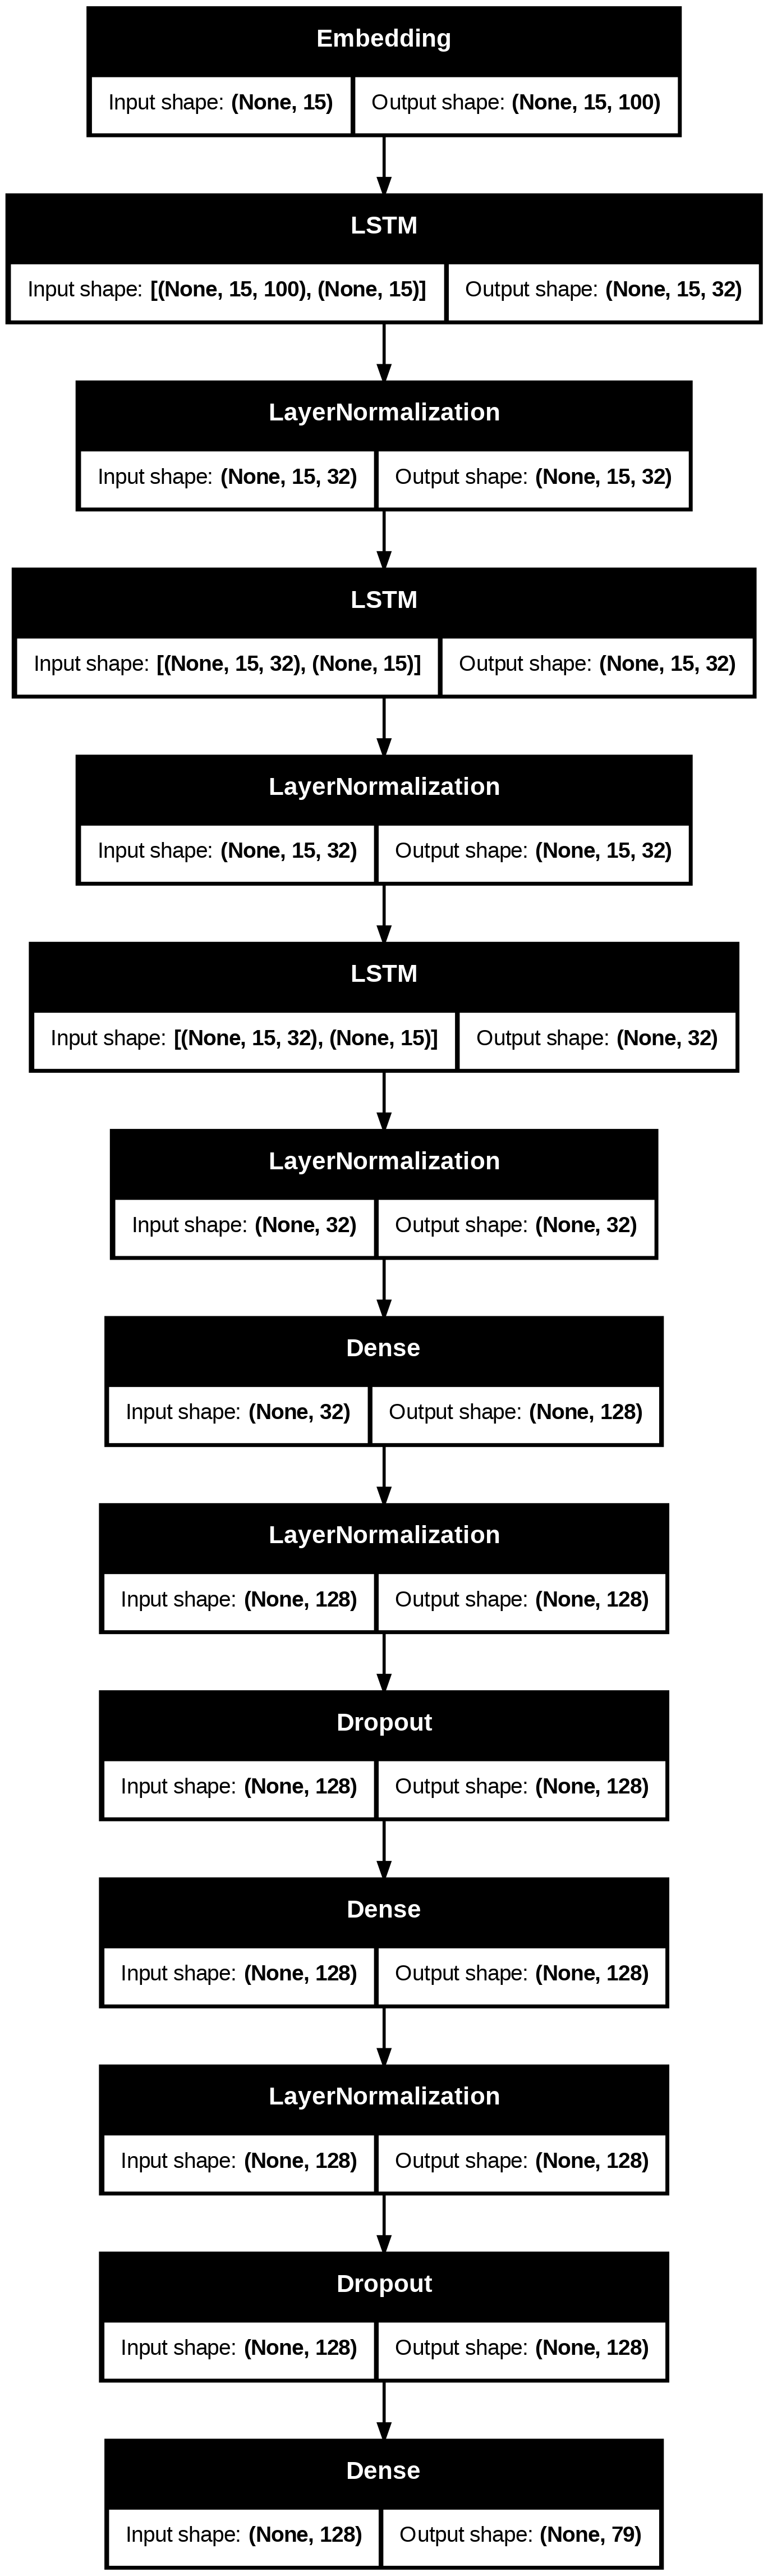

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()  # Membuat model Sequential

# Menambahkan lapisan-lapisan ke dalam model
model.add(Input(shape=(X.shape[1],)))  # Lapisan input dengan bentuk sesuai dengan X
model.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))  # Lapisan embedding dengan vocab_size + 1 sebagai input_dim
model.add(LSTM(32, return_sequences=True))  # Lapisan LSTM dengan 32 unit dan return_sequences=True
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(LSTM(32, return_sequences=True))  # Lapisan LSTM kedua dengan 32 unit dan return_sequences=True
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(LSTM(32))  # Lapisan LSTM ketiga dengan 32 unit
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dense(128, activation="relu"))  # Lapisan dense dengan 128 unit dan fungsi aktivasi ReLU
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dropout(0.2))  # Lapisan dropout dengan tingkat dropout 0.2
model.add(Dense(128, activation="relu"))  # Lapisan dense kedua dengan 128 unit dan fungsi aktivasi ReLU
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dropout(0.2))  # Lapisan dropout kedua dengan tingkat dropout 0.2
model.add(Dense(len(np.unique(y)), activation="softmax"))  # Lapisan dense terakhir dengan jumlah unit sesuai dengan jumlah kelas dan fungsi aktivasi softmax

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])  # Mengompilasi model dengan optimizer Adam, fungsi loss sparse_categorical_crossentropy, dan metrik akurasi

model.summary()  # Menampilkan ringkasan model
plot_model(model, show_shapes=True)  # Menampilkan struktur visual model

In [ ]:
model_history = model.fit(x=X,  # Data input X
                          y=y,  # Data output y
                          batch_size=10,  # Ukuran batch yang digunakan dalam setiap iterasi
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],  # Menggunakan EarlyStopping untuk menghentikan pelatihan jika akurasi tidak meningkat setelah 3 epoch
                          epochs=50,# Jumlah epoch (iterasi) pelatihan
                          validation_split=0.2)

Epoch 1/50
 8/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1010 - loss: 3.9590

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/lstm_1/Assert/Assert defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-9-536509ea0794>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 212, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 570, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py", line 406, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 537, in inner_loop

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/rnn.py", line 841, in lstm

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/rnn.py", line 874, in _cudnn_lstm

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/rnn.py", line 557, in _assert_valid_mask

assertion failed: [You are passing a RNN mask that does not correspond to right-padded sequences, while using cuDNN, which is not supported. With cuDNN, RNN masks can only be used for right-padding, e.g. `[[True, True, False, False]]` would be a valid mask, but any mask that isn\'t just contiguous `True`\'s on the left and contiguous `False`\'s on the right would be invalid. You can pass `use_cudnn=False` to your RNN layer to stop using cuDNN (this may be slower).]
	 [[{{node sequential_1/lstm_1/Assert/Assert}}]] [Op:__inference_one_step_on_iterator_6751]

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
plt.plot(model_history.history['accuracy'], label='Akurasi (Training)')
plt.plot(model_history.history['val_accuracy'], label='Akurasi (Validation)')
plt.title('Akurasi Model Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Evaluasi akhir
loss, accuracy = model.evaluate(X, y)
print(f"Model Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
import re
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Untuk menyimpan respons yang telah digunakan
used_responses = {}

def inputan_user(pattern):
    global used_responses  # Menggunakan variabel global untuk menyimpan respons yang sudah digunakan

    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)
    x_test = pad_sequences(x_test, padding='post', maxlen=X.shape[1])  # pad_sequences now receives list of lists

    # Make prediction using the model
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    # Check if the tag already has used responses
    if tag not in used_responses:
        used_responses[tag] = []

    # Filter responses to find ones that haven't been used yet
    remaining_responses = [r for r in responses if r not in used_responses[tag]]

    if remaining_responses:
        # Pick a random response from remaining responses
        response = random.choice(remaining_responses)
        used_responses[tag].append(response)  # Mark this response as used
    else:
        # If all responses have been used, reset the used responses
        used_responses[tag] = []
        response = random.choice(responses)  # Pick any response randomly

    # Display user input and bot response
    print("User: {}".format(pattern))
    print("BOT: {}".format(response))


In [ ]:
inputan_user("halo sayang")

In [ ]:
# model.save('serenitas.h5')

In [ ]:
inputan_user("kesehatan mental ku terganggu")